<a href="https://colab.research.google.com/github/sayarghoshroy/Recurrent_NN_Modelling/blob/master/sequence_modeling_with_LP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Predicting a Sequence with a Single-Layer Perceptron

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
alphas = [0.6, 0.4, 0.3, -0.2, -0.1]
# alphas = [0.1, 0.1, 0.1, 0.1, 1]
sigma = 0.5

In [ ]:
n = [i for i in range(1, 6)]
x = [-2, -1, 0, 2, 1]

datapoints_count = 3000
# train on first 2500
# test on next 500
for i in range(datapoints_count - 5):
    num = n[len(n) - 1] + 1
    term = np.dot(np.asarray(x)[len(x) - 5:len(x)], np.asarray(alphas)) + np.random.normal(0, sigma, 1)[0]
    n.append(num)
    x.append(term)

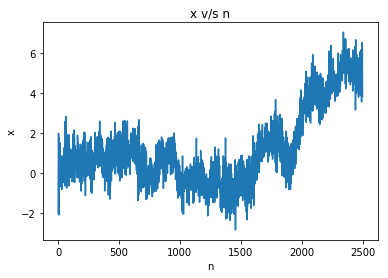

In [ ]:
plt.figure()
plt.title('x v/s n')
plt.xlabel('n')
plt.ylabel('x')
plt. plot(n[:2500], x[:2500])
plt.show()

In [ ]:
def test_loss(w):
    # Computes loss of the test set i.e the last 500 datapoints
    get_d = np.shape(w)[0]
    total_loss = 0
    
    for k in range(get_d + 1 + 2500, 3000):
        total_loss += np.power(x[k] - np.dot(np.asarray(w), np.asarray(x)[k - get_d : k]), 2)
    return total_loss / len(range(get_d + 1, len(n)))
        
test_loss([0, 0])

6.872193719337146

In [ ]:
def grad(w):
    # Computes gradient of the train set i.e the first 2500 datapoints
    get_d = np.shape(w)[0]
    total_loss = 0
    
    for k in range(get_d + 1, 2500):
        total_loss += (-2) * (x[k] - np.dot(np.asarray(w), np.asarray(x)[k - get_d : k])) * (np.sum(np.asarray(x)[k - get_d : k]))
    return total_loss / len(range(get_d + 1, len(n)))

grad([1, 1])

17.542633177210522

In [ ]:
# One Layer Perceptron
# No Activation function
# Since we want to perform a regression

def run_gradient_descent(d):
    old_w = np.ones(d)
    w = np.zeros(d)

    learn_rate = 0.001
    iter_count  = 0
    max_iter  = 1000

    while np.linalg.norm(w - old_w) > 0.05:
        old_w = w
        w = w - learn_rate * grad(w)
        iter_count += 1
        if iter_count > max_iter:
            break
    
    return w

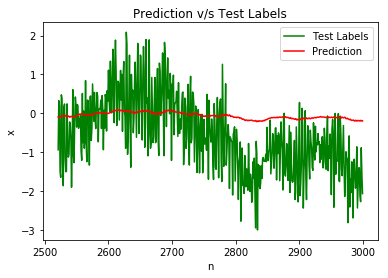

In [ ]:
# Getting the predicted labels on the train_set
weights = run_gradient_descent(10)
n_tests = []
n_test_preds = []
n_test_gold = []

for i in range(2521, 3000):
    n_tests.append(i)
    n_test_preds.append(np.dot(np.asarray(weights), np.asarray(x)[i - 10 - 1 : i - 1]))
    n_test_gold.append(x[i])
    
plt.figure()
plt.title('Prediction v/s Test Labels')
plt.xlabel('n')
plt.ylabel('x')
plt.plot(n_tests, n_test_gold, color = 'green', label = 'Test Labels')
plt.plot(n_tests, n_test_preds, color = 'red', label = 'Prediction')
plt.legend()
plt.show()

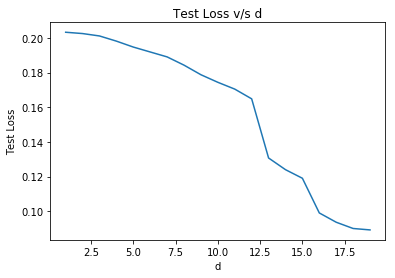

In [ ]:
# Plotting the loss v/s d graph
test_d = []
test_losses = []
for k in range(1, 20):
    weights = run_gradient_descent(k)
    calc_loss = test_loss(weights)
    test_d.append(k)
    test_losses.append(calc_loss)
    
plt.figure()
plt.title('Test Loss v/s d')
plt.xlabel('d')
plt.ylabel('Test Loss')
plt.plot(test_d, test_losses)
plt.show()

In [ ]:
# ^_^ Thank You